### Instrucciones
1. Sin utilizar las bibliotecas de *scikit-learn* para regresión lineal, elabora un programa en Python que implemente **BGD monovariable sin sesgo**.

### Entrada
- Archivo `casas.csv`
- Número de iteraciones
- Peso inicial
- Valor de α (learning rate)

### Procedimiento
- Divide `casas.csv` en:
  - 70% para entrenamiento
  - 30% para pruebas  
  Usando los parámetros:  
  `shuffle=True` y `random_state=0`.

### Salida
(Ver ejemplo de la **Figura 1**)

- Peso en cada iteración calculado con el conjunto de entrenamiento.
- Valores `y_test`.
- Valores `y_pred` en cada iteración.
- Error de estimación:  

  $
  \sigma = \sum_{i=1}^{n} (y_{pred_i} - y_{test_i})
  $

- **Gráfica 1**
  - Distribución de los datos de prueba
  - Valores `y_pred` en cada iteración
- **Gráfica 2**
  - Error de estimación de cada iteración

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

$$Y = XW$$

In [56]:
def predict(X, weights):
    return X.dot(weights)

  $$
  \sigma = \sum_{i=1}^{n} (y_{pred_i} - y_{test_i})
  $$

In [57]:
def error(y_true, y_pred):
    """Error: suma de valores absolutos de la diferencia"""
    return float(np.sum(np.abs(y_pred - y_true)))

$$ \frac{\partial \sigma}{\partial w} = (w \times X - Y) \cdot X$$

In [ ]:
def gradient(index, W, X, Y, j):
    #print("X: ", X.T[index])
    #print("W: ", W, " W index: ", W[0][index])
    #print(Y)
    Y_pred = W[index] * X.T[index][j]  # Predicción
    print("W[index]: ", W[index])
    print("X.T[index][j]: ", X.T[index][j])
    print("Y[j]: ", Y[j])
    print("X.T[index][j]: ", X.T[index][j])
    return ((Y_pred - Y[j]) * X.T[index][j])  # Gradiente

In [59]:
def gradient_bueno(index, W, X, Y):
    """
    Gradiente para W[index] en regresión multivariable
    Fórmula: grad_i = (1/m) * X[:, i].T @ (X @ W - Y)
    """
    m = len(Y)
    Y_pred = predict(X, W)  # Predicción con TODOS los pesos
    residual = Y_pred - Y
    return np.dot(X[:, index], residual)

$$\Delta w = -2 \times \frac{\partial \sigma}{\partial w} \times \alpha$$

In [60]:
def increment(index, W, X, Y, j, alpha):
    grad = gradient(index, W, X, Y, j)
    return - 2 * alpha * grad

$$w = w + \Delta w$$

In [61]:
def update_weights(W, X, Y, j, alpha):
    increments = np.array([increment(i, W, X, Y, j, alpha) for i in range(len(W))])
    W += increments


In [62]:
def batch_gradient_descent(X_train, Y_train, X_test, Y_test, initial_weights,
                           learning_rate=1e-6, n_iterations=1000):
    """BGD multivariable sin sesgo"""
    W = np.array(initial_weights)
    n_features = X_train.shape[1]
    if W.shape[0] != n_features:
        raise ValueError("Inicial_weights debe tener longitud igual a n_features")

    weights_history = []
    errors_history = []
    ypreds_history = []
    for iteration in range(n_iterations):
        j : int = int(input("Ingresa el valor de j: ")) 
        alpha : float = float(input("Ingresa el valor de alpha: "))
        update_weights(W, X_train, Y_train, j, alpha)
        
        # Guardar copia completa del vector de pesos
        weights_history.append(W.copy())
        
        ypred_test = predict(X_test, W)                       # (m_test,)
        err_test = error(Y_test, ypred_test)

        errors_history.append(err_test)
        ypreds_history.append(ypred_test.copy())

        print("=== ITREATION: ", iteration, " ===")
        print("prediction: ", ypred_test)
        print("error: ", err_test)
        print("pesos: ", W)
        
    return W, weights_history, errors_history, ypreds_history

X_train: (6, 2), X_test: (1, 2), Y_train: (6,), Y_test: (1,)
Y_pred:  0.1
Y[j]:  7
X.T[index][j]:  1.0
Y_pred:  1.0
Y[j]:  7
X.T[index][j]:  5.0
=== ITREATION:  0  ===
prediction:  [7.88]
error:  3.879999999999999
pesos:  [ 4.24 18.2 ]
Y_pred:  4.239999999999999
Y[j]:  11
X.T[index][j]:  1.0
Y_pred:  127.39999999999999
Y[j]:  11
X.T[index][j]:  7.0
=== ITREATION:  1  ===
prediction:  [1.632]
error:  2.3680000000000003
pesos:  [  4.5104 -14.392 ]

=== RESULTADOS FINALES ===
Pesos finales: [  4.5104 -14.392 ]
Primeros valores y_test: [4]
Primeros valores y_pred (última iter): [1.632]
Error final en test: 2.368000


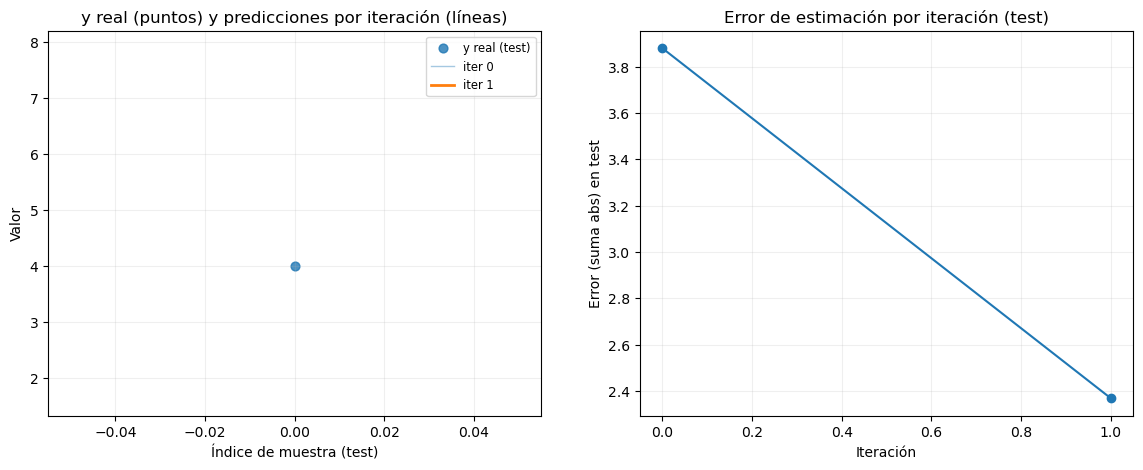

In [63]:
# ---------------- main (configurar como en tu script) ----------------
dataset = pd.read_csv('data.csv')
n_features = dataset.shape[1] - 1
initial_weights = np.array([0.1, 0.2])
learning_rate = 0.01
n_iterations = 2

# Split (los .values ya convierten a ndarray)
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.14285714285, shuffle=False
)

print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, Y_train: {Y_train.shape}, Y_test: {Y_test.shape}")

# Entrenamiento (ahora guardamos predicciones en test por iteración)
best_weights, weights_history, errors_history, ypreds_history = batch_gradient_descent(
    X_train, Y_train, X_test, Y_test,
    initial_weights,
    learning_rate=learning_rate,
    n_iterations=n_iterations,
)

# Predicción final (última iteración)
Y_pred_final = ypreds_history[-1]

print("\n=== RESULTADOS FINALES ===")
print(f"Pesos finales: {best_weights}")
print(f"Primeros valores y_test: {Y_test[:10]}")
print(f"Primeros valores y_pred (última iter): {Y_pred_final[:10]}")
print(f"Error final en test: {error(Y_test, Y_pred_final):.6f}")

# ---------------------- GRAFICAS ----------------------

# 1) Gráfica: y_test (puntos) + y_pred por iteración (líneas)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)

m_test = len(Y_test)
indices = np.arange(m_test)

# scatter de reales
plt.scatter(indices, Y_test, label='y real (test)', alpha=0.8, s=40)

# seleccionar iteraciones a mostrar (para no saturar)
max_lines_to_plot = 8
if n_iterations <= max_lines_to_plot:
    iter_indices = list(range(n_iterations))
else:
    iter_indices = np.unique(np.round(np.linspace(0, n_iterations - 1, max_lines_to_plot)).astype(int)).tolist()

for idx, it in enumerate(iter_indices):
    ypred_it = ypreds_history[it]
    alpha = 0.4 if it != (n_iterations - 1) else 1.0
    lw = 1.0 if it != (n_iterations - 1) else 2.0
    # dibujamos como línea conectando orden de índices
    plt.plot(indices, ypred_it, label=f'iter {it}', alpha=alpha, linewidth=lw)

plt.xlabel('Índice de muestra (test)')
plt.ylabel('Valor')
plt.title('y real (puntos) y predicciones por iteración (líneas)')
plt.legend(fontsize='small')
plt.grid(alpha=0.2)

# 2) Error vs iteración (historial de test)
plt.subplot(1, 2, 2)
plt.plot(np.arange(len(errors_history)), errors_history, marker='o')
plt.xlabel('Iteración')
plt.ylabel('Error (suma abs) en test')
plt.title('Error de estimación por iteración (test)')
plt.grid(alpha=0.2)